# Практична робота № 4
# Тема. Алгоритми пошуку та їх складність
# Мета: опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності

# 1. Оцінити асимптотичну складність алгоритму лінійного пошуку у O-нотації в найгіршому і найкращому випадку. Як можна покращити алгоритм лінійного пошуку?
Найкращий випадок: O(1) — шуканий елемент знаходиться на першому місці.
Найгірший випадок: O(n) — елемент останній або його немає в списку.
Покращення:
Якщо список відсортований, можна застосувати бінарний пошук замість лінійного.
У випадку частих запитів до одного й того ж елемента, використовують self-organizing lists — переміщення часто шуканого елемента ближче до початку.
Паралельний пошук на багатоядерних системах.
# 2. Оцінити асимптотичну складність алгоритму бінарного пошуку у O-нотації в найгіршому і найкращому випадку.
Найкращий випадок: O(1) — елемент на середині списку.
Найгірший випадок: O(log₂(n)) — кількість кроків для поділу списку на половини до знаходження елемента або завершення пошуку.
# 3. Побудувати алгоритм тернарного пошуку і оцінити його складність. Який з алгоритмів — бінарний чи тернарний — оптимальніший?
Алгоритм тернарного пошуку:
Поділяє відсортований масив не на 2 частини, а на 3 частини.
Порівнює шуканий елемент із двома точками розділу.
Продовжує пошук у відповідній третині.
Складність:
Найкращий випадок: O(1)
Найгірший випадок: O(log₃(n))
Порівняння:
Бінарний пошук швидший у реальності, бо має менше порівнянь на ітерацію (1 порівняння замість 2).
Хоч log₃(n) < log₂(n), але кожен крок тернарного пошуку вимагає більше операцій, тому бінарний пошук більш ефективний на практиці.

# 4. Експериментальне дослідження (Python)

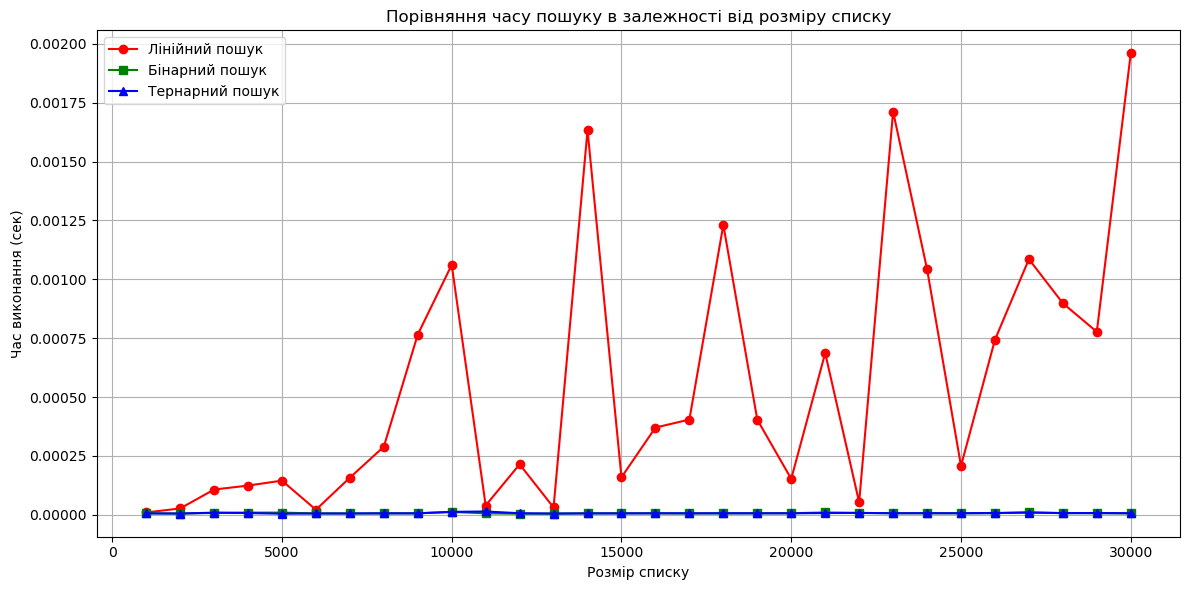

In [1]:
import timeit
import matplotlib.pyplot as plt
import random

# --- Алгоритми пошуку ---
def linear_search(arr, target):
    for i in arr:
        if i == target:
            return True
    return False

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return True
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False

def ternary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        third = (right - left) // 3
        mid1 = left + third
        mid2 = right - third
        if arr[mid1] == target or arr[mid2] == target:
            return True
        elif target < arr[mid1]:
            right = mid1 - 1
        elif target > arr[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1
    return False

# --- Вимірювання часу ---
def measure_time(search_func, arr, target, repeat=3):
    return timeit.timeit(lambda: search_func(arr, target), number=repeat) / repeat

# --- Дані для побудови графіків ---
sizes = [1000 * i for i in range(1, 31)]  # Від 1 000 до 30 000
times_linear = []
times_binary = []
times_ternary = []

for size in sizes:
    arr = sorted(random.sample(range(size * 2), size))  # Унікальні числа, відсортовані
    target = random.choice(arr)  # Пошук елемента, що існує

    times_linear.append(measure_time(linear_search, arr, target))
    times_binary.append(measure_time(binary_search, arr, target))
    times_ternary.append(measure_time(ternary_search, arr, target))

# --- Побудова графіка ---
plt.figure(figsize=(12, 6))
plt.plot(sizes, times_linear, label='Лінійний пошук', color='red', marker='o')
plt.plot(sizes, times_binary, label='Бінарний пошук', color='green', marker='s')
plt.plot(sizes, times_ternary, label='Тернарний пошук', color='blue', marker='^')

plt.xlabel("Розмір списку")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння часу пошуку в залежності від розміру списку")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Порівняти алгоритми за здатністю працювати з відсортованими та не відсортованими списками.
Лінійний пошук — працює як з відсортованими, так і з не відсортованими списками. Йому все одно.
Бінарний і тернарний пошук — вимагають відсортованого списку, інакше вони не працюють правильно.
Висновок:
Якщо список не відсортований, і сортування займе більше часу, ніж очікуваний виграш — краще використати лінійний пошук.
Якщо список вже відсортований або використовується багаторазово — варто застосовувати бінарний або тернарний.
# 6. Сценарії використання кожного з алгоритмів у практичних задачах
Лінійний пошук — для коротких або неструктурованих списків, коли пошук виконується одноразово, і сортування не виправдане.
Приклад: Пошук користувача в маленькому списку учасників чату.
Бінарний пошук — для великих відсортованих структур.
Приклад: Пошук товару в каталозі, бінарний пошук у словниках, індексах баз даних.
Тернарний пошук — використовується рідко для списків, але може бути корисним у безперервних функціях або унімодальних функціях для знаходження екстремуму.
Приклад: Оптимізація в математиці (пошук мінімуму або максимуму).

# Контрольні питання


# 1. Що таке алгоритм пошуку і чому він важливий у контексті комп'ютерних наук?
**Алгоритм пошуку — це метод знаходження елемента у структурі даних.
Він важливий, бо використовується майже в усіх програмах: базах даних, пошуковиках, навігації тощо.**
# 2. Які основні критерії оцінки ефективності алгоритмів пошуку?
**Час виконання, споживання памʼяті, простота реалізації, стабільність і здатність працювати з різними типами даних.**
# 3. Що таке лінійний пошук, і як він працює?
**Лінійний пошук перевіряє кожен елемент списку по черзі, доки не знайде шуканий або не дійде до кінця.**
# 4. Які умови повинні бути виконані для успішного застосування бінарного пошуку?
**Список повинен бути відсортованим.
Доступ до елементів має бути прямим (через індекс, як у масиві).**
# 5. Які переваги та недоліки використання бінарного пошуку порівняно з іншими алгоритмами пошуку?
**Переваги — швидкий (O(log n)), ефективний для великих даних.
Недоліки — працює лише на відсортованих структурах, складніший за лінійний пошук.**
# 6. Що таке тернарний пошук, і в чому його відмінність від бінарного пошуку?
**Тернарний пошук ділить список на три частини замість двох.
Він використовує два контрольні пункти замість одного, але на практиці повільніший за бінарний.**